In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
df=pd.read_csv('../data/raw/raw_analyst_ratings.csv')

In [ ]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
0


In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [7]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

df['cleaned_headline'] = df['headline'].apply(clean_text)


count    526948.000000
mean         73.327556
std          41.079174
min           5.000000
25%          47.000000
50%          64.000000
75%          87.000000
max         509.000000
Name: headline_length, dtype: float64


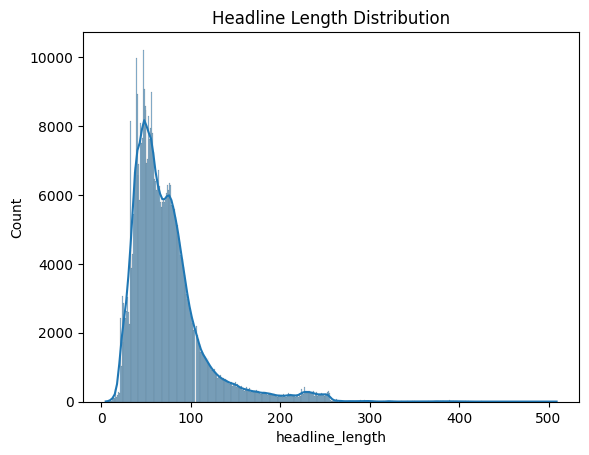

In [8]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'], kde=True)
plt.title('Headline Length Distribution')
plt.show()

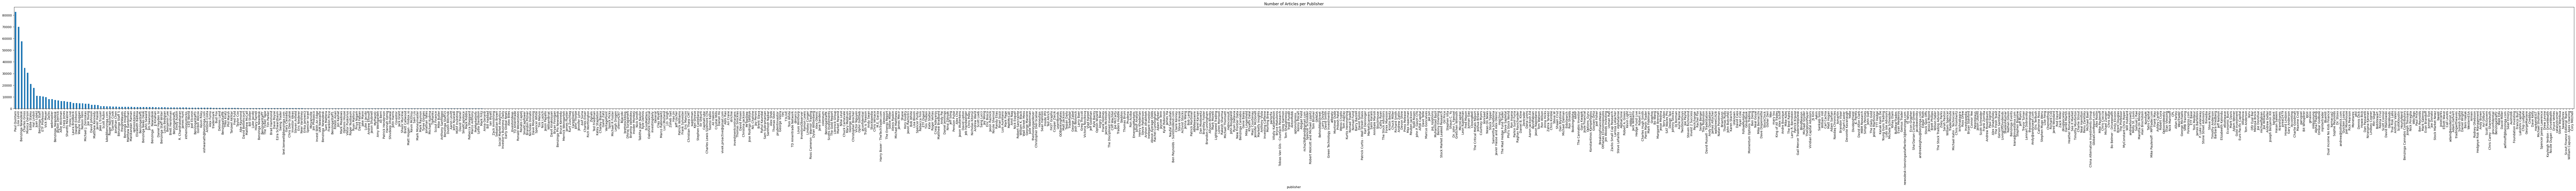

In [11]:
publisher_count = df['publisher'].value_counts()
publisher_count.plot(kind='bar', figsize=(150, 6))
plt.title('Number of Articles per Publisher')
plt.show()

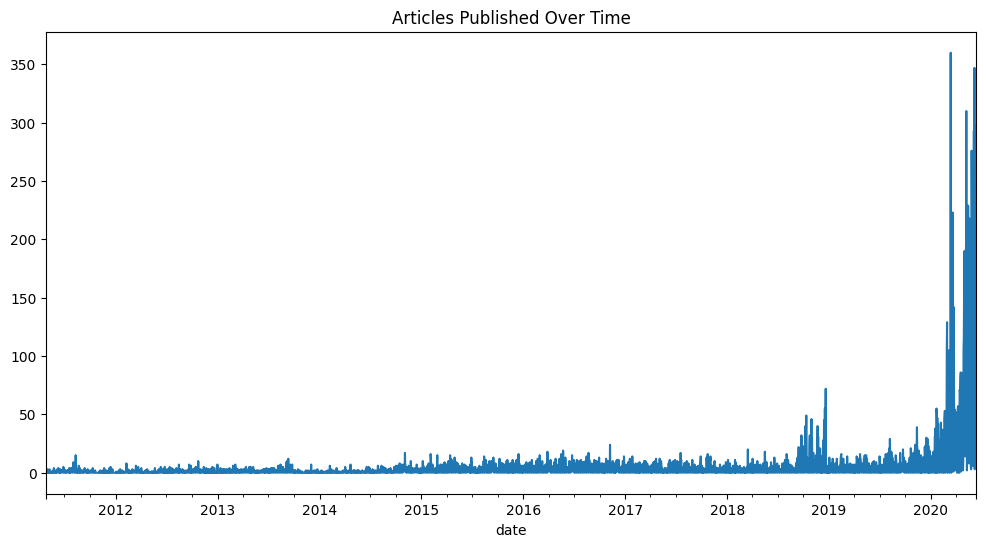

In [12]:
df.set_index('date')['headline'].resample('D').count().plot(figsize=(12, 6))
plt.title('Articles Published Over Time')
plt.show()

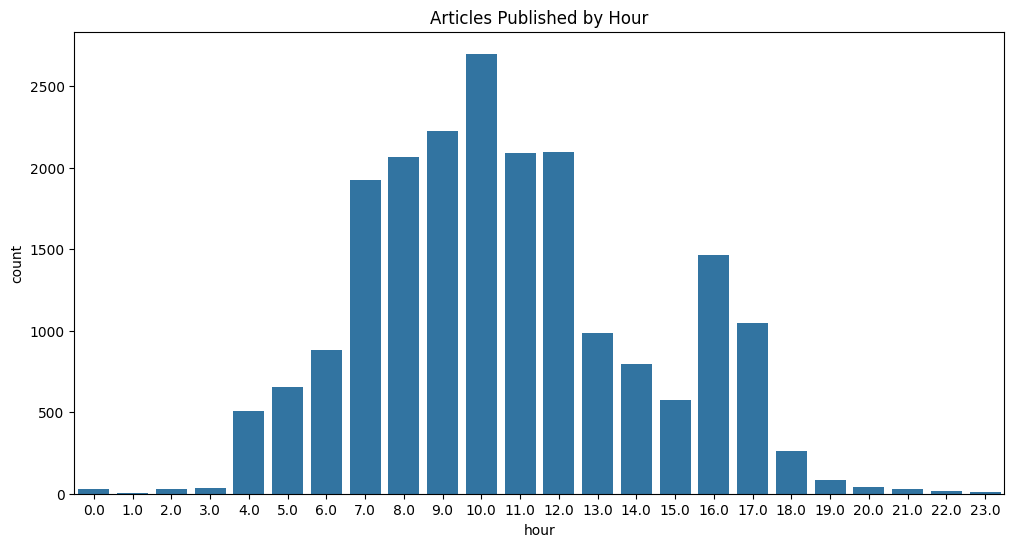

In [17]:
sns.countplot(x='hour', data=df)
plt.gcf().set_size_inches(12, 6)
plt.title('Articles Published by Hour')
plt.show()

In [18]:
df['sentiment'] = df['cleaned_headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [19]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

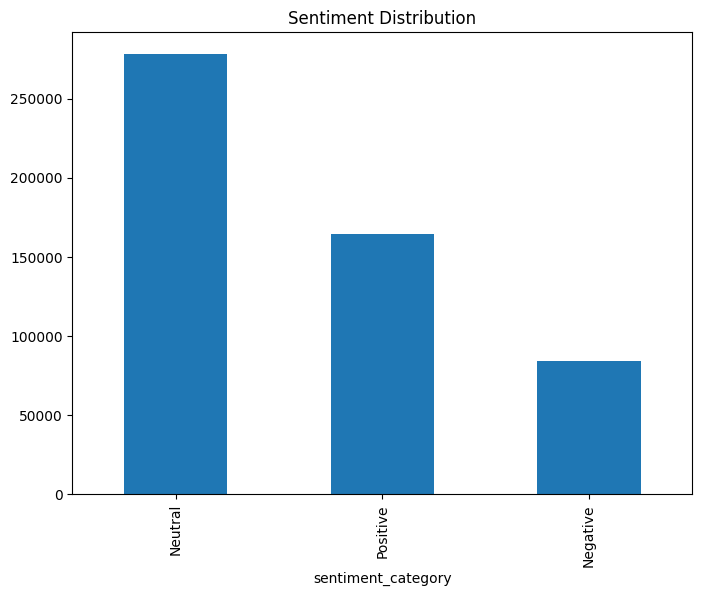

In [20]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Distribution')
plt.show()

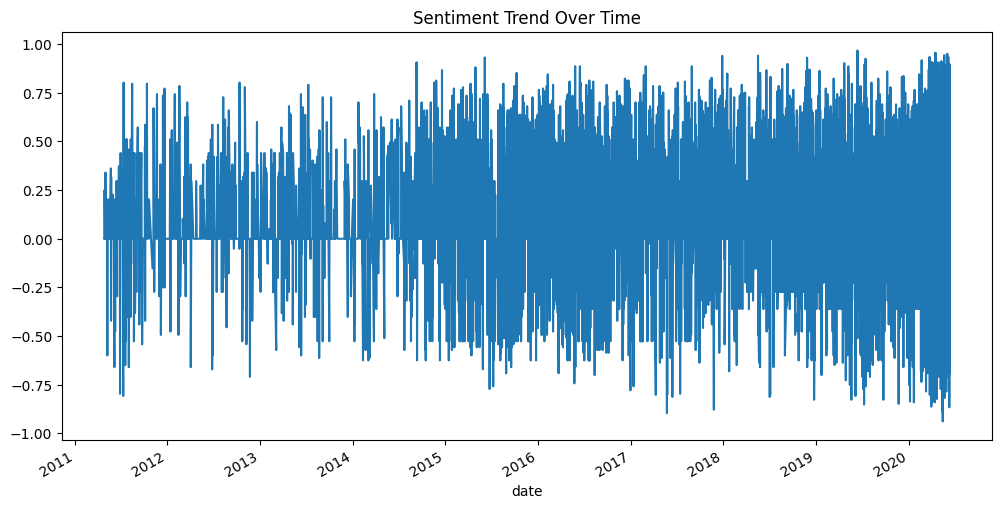

In [21]:
sentiment_trend = df.groupby('date')['sentiment'].mean()
sentiment_trend.plot(figsize=(12, 6))
plt.title('Sentiment Trend Over Time')
plt.show()

In [22]:
df.to_csv('/content/cleaned_analyst_ratings.csv', index=False)